# Imports

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dataset

In [4]:
df = pd.read_csv('adult.csv')

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Explorator Analysis

In [6]:
df.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education.num     32561
marital.status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital.gain      32561
capital.loss      32561
hours.per.week    32561
native.country    32561
income            32561
dtype: int64

In [7]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status','occupation', 'relationship', 'race', 'sex','capital-gain', 'capital-loss','hours-per-week', 'native-country', 'income']
df.columns = columns

df.dropna(inplace=True)

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

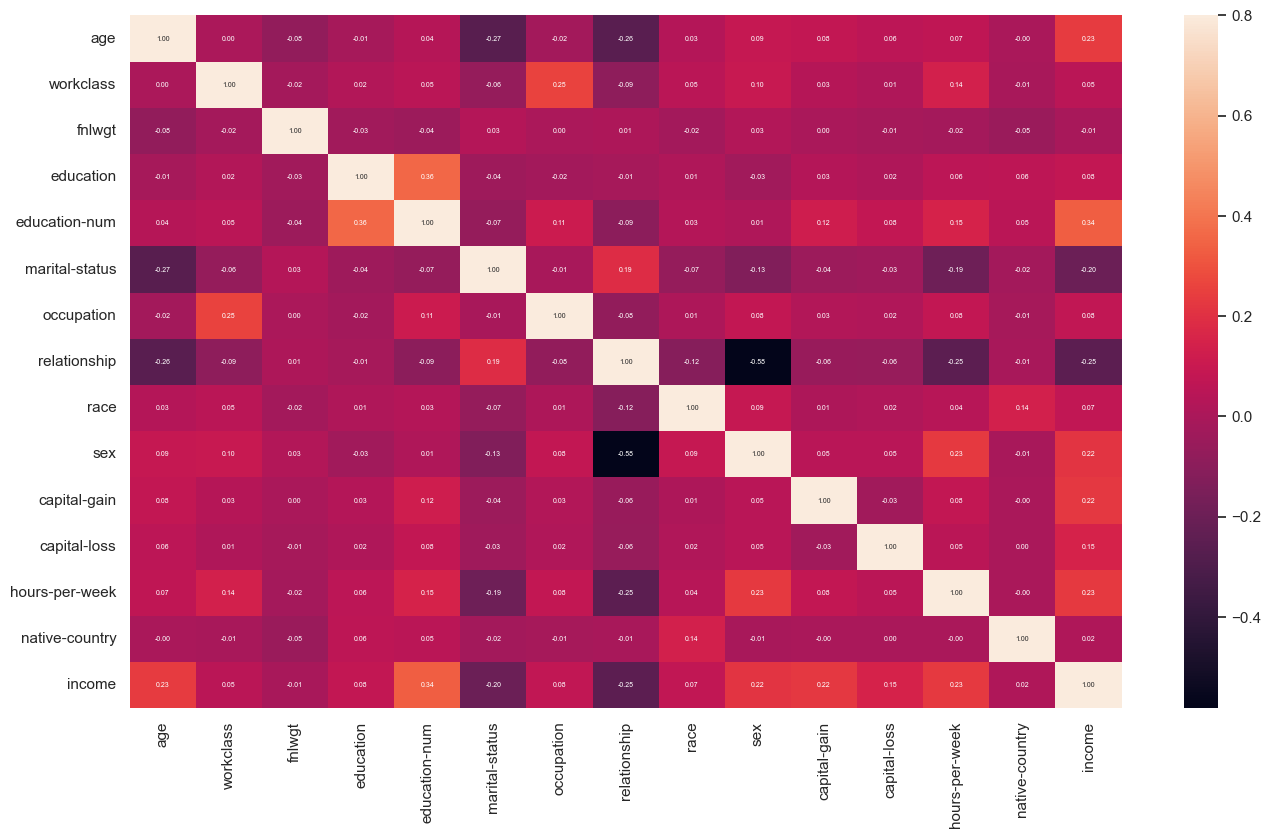

In [12]:
corr = df.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.subplots(figsize=(16, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 5}, annot=True, fmt='.2f');

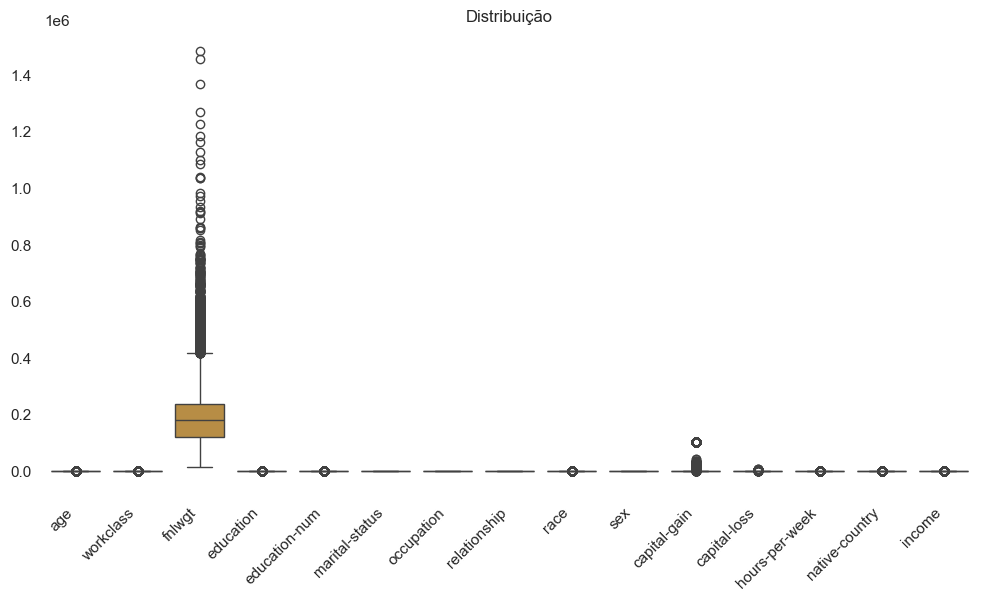

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribuição')
plt.show()

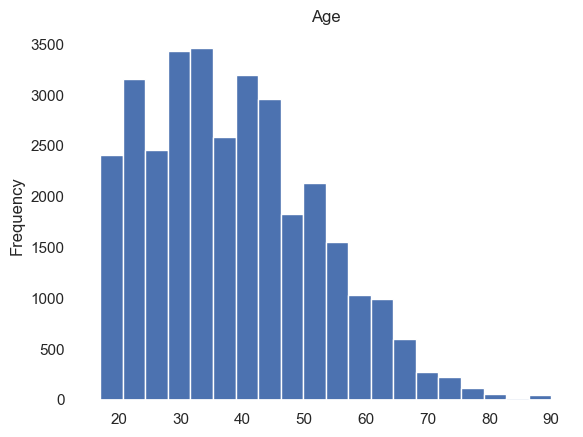

In [14]:
df['age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

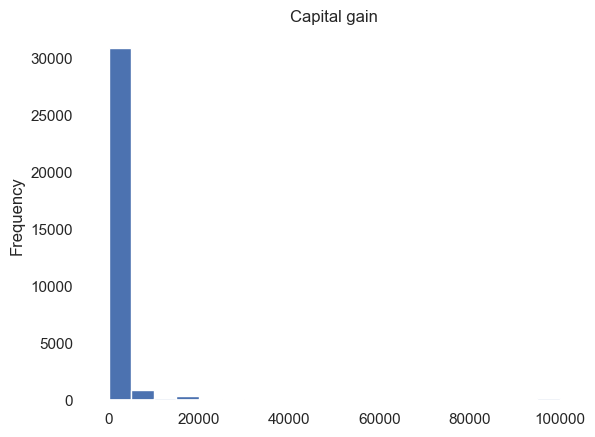

In [16]:
df['capital-gain'].plot(kind='hist', bins=20, title='Capital gain')
plt.gca().spines[['top', 'right',]].set_visible(False)

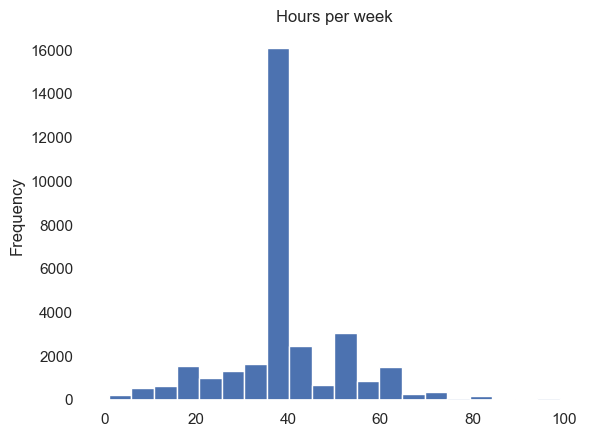

In [18]:
df['hours-per-week'].plot(kind='hist', bins=20, title='Hours per week')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
corr = df.corr()
corr_list = corr['income'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

education-num     0.335154
age               0.234037
hours-per-week    0.229689
capital-gain      0.223329
sex               0.215980
capital-loss      0.150526
education         0.079317
occupation        0.075468
race              0.071846
workclass         0.051604
native-country    0.015840
fnlwgt           -0.009463
marital-status   -0.199307
relationship     -0.250918
Name: income, dtype: float64

# Decision Tree

In [25]:
x = df.drop('income', axis=1)
y = df['income']

In [24]:
dt= DecisionTreeClassifier(random_state=42)

In [28]:
scoring = ['accuracy', 'precision_micro', 'recall_macro', 'f1_weighted']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(dt, x, y, cv=kf, scoring=scoring)

In [34]:
results = cross_validate(dt, x, y, cv=kf, scoring=scoring)
for metric in scoring:
    scores = results[f'test_{metric}']
    print(f"{metric.replace('_', ' ').title():<20}: {np.mean(scores):.4f}")

Accuracy            : 0.8098
Precision Micro     : 0.8098
Recall Macro        : 0.7450
F1 Weighted         : 0.8107


In [29]:
dt.fit(x, y)
feature_imp = pd.Series(dt.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

fnlwgt            0.202261
relationship      0.198521
capital-gain      0.115496
education-num     0.115254
age               0.113873
hours-per-week    0.072567
occupation        0.057794
capital-loss      0.038529
workclass         0.036399
native-country    0.013457
race              0.012599
education         0.012455
marital-status    0.006532
sex               0.004264
dtype: float64

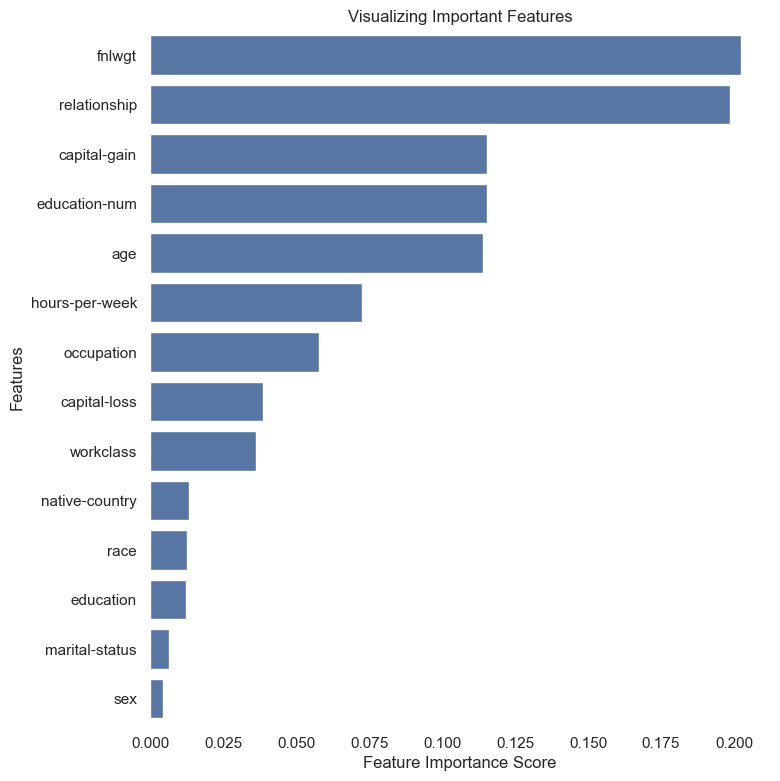

In [31]:
plt.figure(figsize=(8,9))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

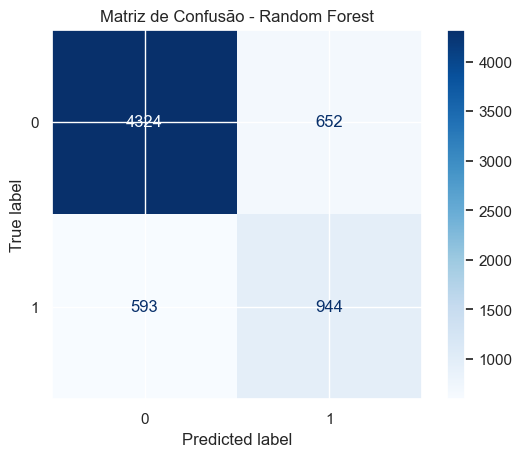

In [33]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# Random Forest

In [35]:
x = df.drop('income', axis=1)
y = df['income']

In [36]:
rf = RandomForestClassifier(random_state=42)

In [37]:
scoring = ['accuracy', 'precision_micro', 'recall_macro', 'f1_weighted']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(rf, x, y, cv=kf, scoring=scoring)

In [38]:
results = cross_validate(rf, x, y, cv=kf, scoring=scoring)
for metric in scoring:
    scores = results[f'test_{metric}']
    print(f"{metric.replace('_', ' ').title():<20}: {np.mean(scores):.4f}")

Accuracy            : 0.8567
Precision Micro     : 0.8567
Recall Macro        : 0.7769
F1 Weighted         : 0.8523


In [39]:
rf.fit(x, y)
feature_imp = pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

fnlwgt            0.171545
age               0.151050
capital-gain      0.117863
relationship      0.102454
education-num     0.088603
hours-per-week    0.083261
occupation        0.067873
marital-status    0.065337
workclass         0.039382
capital-loss      0.036388
education         0.031915
native-country    0.017078
race              0.013742
sex               0.013508
dtype: float64

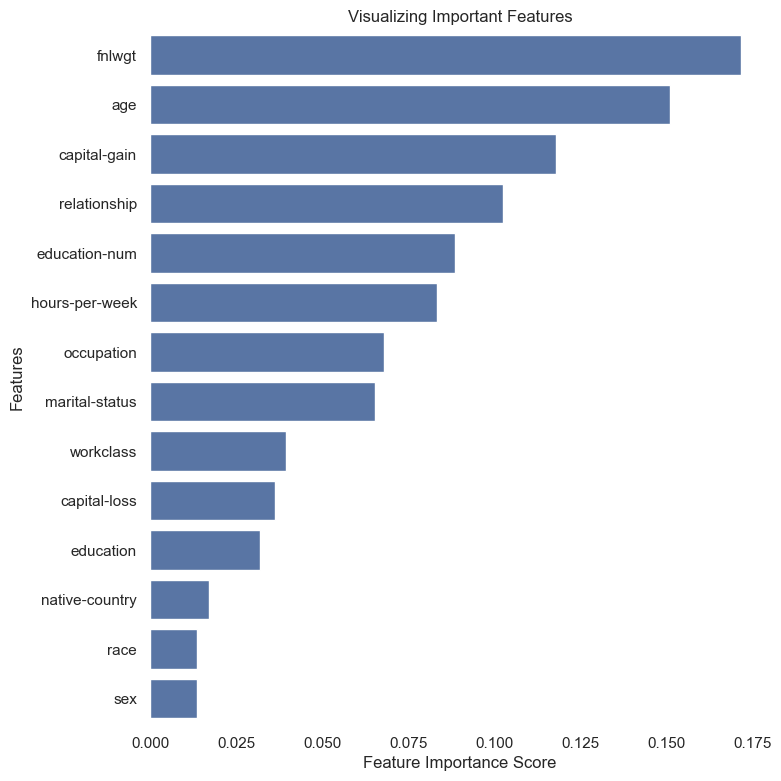

In [40]:
plt.figure(figsize=(8,9))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

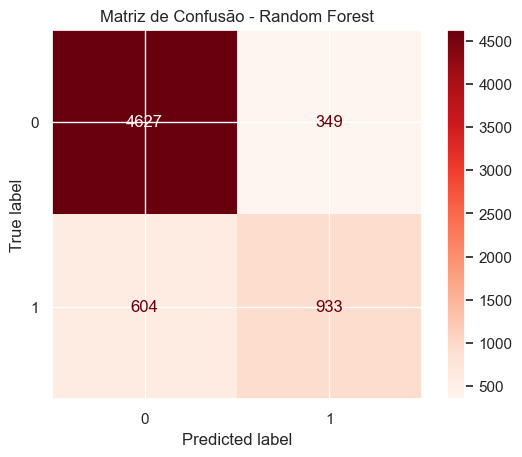

In [44]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title("Matriz de Confusão - Random Forest")
plt.show()